# The Interactive Brokers (IBKR) API

## Getting Started

__Installation of IB API Wrapper Package with the following Command:__

pip install ib_insync

__Documentation__

https://ib-insync.readthedocs.io/readme.html

In [2]:
!{sys.executable} -m pip install ib_insync --break-system-packages
!{sys.executable} -m pip install pandas --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 931.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 8.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 10.8 MB/s eta 0:00:00


__Required changes in TWS API-Settings__ (marked yellow)

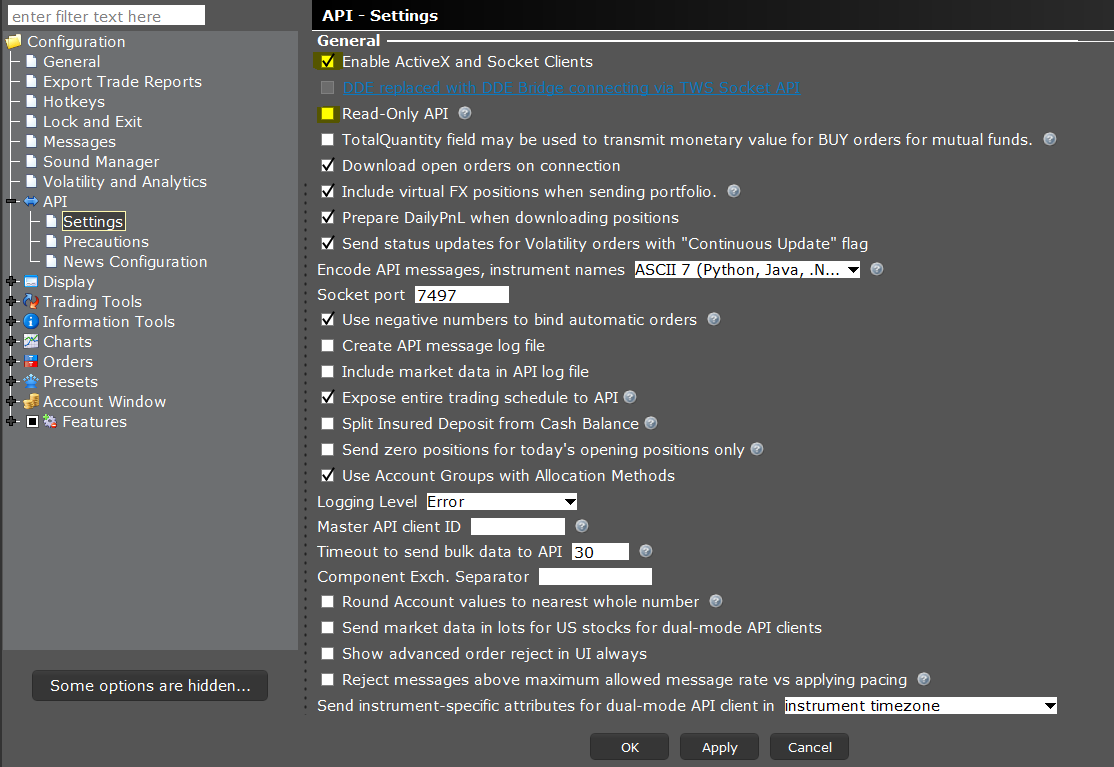

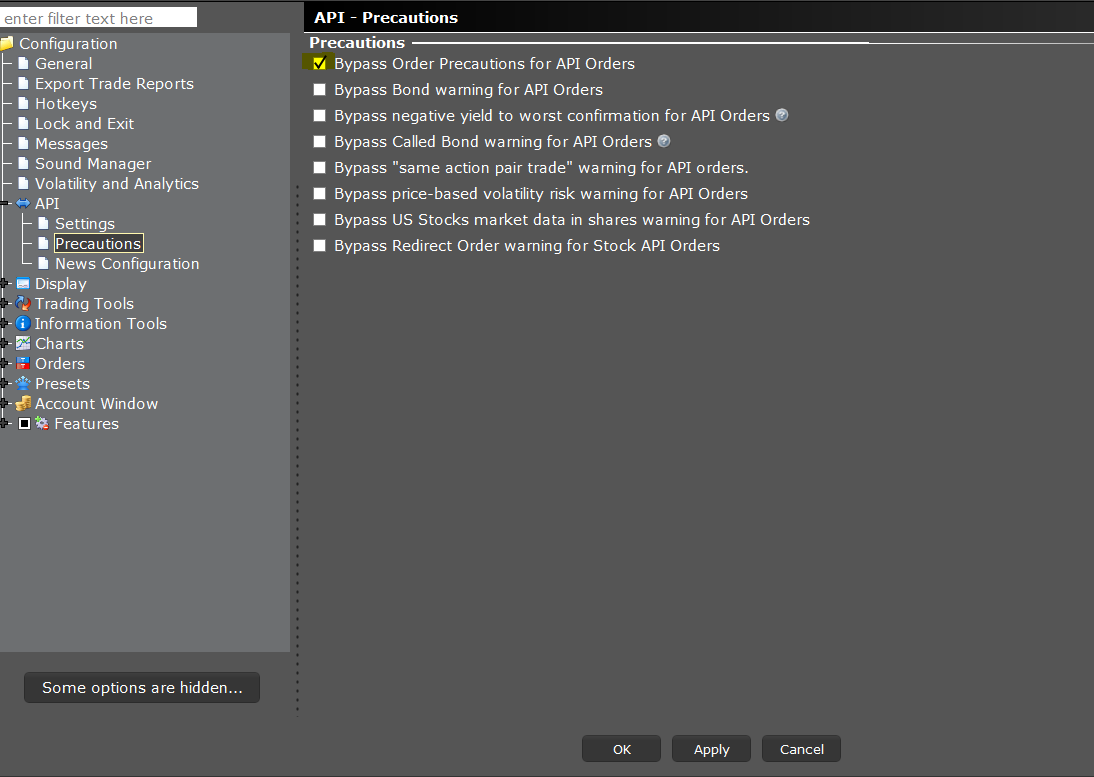

## Connection

In [3]:
from ib_insync import *
# util.startLoop() # required in Jupyter (interactive environments), not in scripts 

In [4]:
ib = IB()

__Make sure you are logged in your TWS!!!__

In [6]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [7]:
ib.positions()

[Position(account='U19651793', contract=Stock(conId=27684070, symbol='VGK', exchange='ARCA', currency='USD', localSymbol='VGK', tradingClass='VGK'), position=0.8618, avgCost=69.1445811),
 Position(account='U19651793', contract=Stock(conId=45540759, symbol='SPEM', exchange='ARCA', currency='USD', localSymbol='SPEM', tradingClass='SPEM'), position=1.0, avgCost=37.9558),
 Position(account='U19651793', contract=Stock(conId=13002605, symbol='IWP', exchange='ARCA', currency='USD', localSymbol='IWP', tradingClass='IWP'), position=1.6199, avgCost=110.49793195),
 Position(account='U19651793', contract=Stock(conId=10672, symbol='O', exchange='NYSE', currency='USD', localSymbol='O', tradingClass='O'), position=0.9479, avgCost=62.86243275),
 Position(account='U19651793', contract=Stock(conId=52170893, symbol='ICLN', exchange='NASDAQ', currency='USD', localSymbol='ICLN', tradingClass='NMS'), position=6.7038, avgCost=14.31410545),
 Position(account='U19651793', contract=Stock(conId=424099317, symbol

In [ ]:
ib.disconnect()

## Contracts (Introduction)

In [11]:
from ib_insync import *
util.startLoop()

In [12]:
ib = IB()

In [14]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [15]:
contract = Forex("EURUSD")
contract

Forex('EURUSD', exchange='IDEALPRO')

In [16]:
contract = ib.qualifyContracts(contract)
contract

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD')]

In [17]:
type(contract)

list

In [19]:
contract[0]

Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD')

In [20]:
contract[0].conId

12087792

__Contracts by Asset Class__

In [22]:
# Contract(conId=270639)
# Stock('AMD', 'SMART', 'USD')
# Stock('INTC', 'SMART', 'USD', primaryExchange='NASDAQ')
# Forex('EURUSD')
# CFD('IBUS30')
# Future('ES', '20180921', 'GLOBEX')
# Option('SPY', '20170721', 240, 'C', 'SMART')
# Bond(secIdType='ISIN', secId='US03076KAA60');

In [23]:
contract = Stock("AAPL", "SMART", "USD")
contract

Stock(symbol='AAPL', exchange='SMART', currency='USD')

In [24]:
contract = ib.qualifyContracts(contract) # unambiguous
contract

[Stock(conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')]

In [25]:
contract = ib.qualifyContracts(Stock("AAPL")) # ambiguous
contract

Ambiguous contract: Stock(symbol='AAPL'), possibles are [Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), Contract(secType='STK', conId=273982664, symbol='AAPL', exchange='SMART', primaryExchange='EBS', currency='CHF', localSymbol='AAPL', tradingClass='AAPL'), Contract(secType='STK', conId=532640894, symbol='AAPL', exchange='SMART', primaryExchange='AEQLIT', currency='CAD', localSymbol='AAPL', tradingClass='AAPL'), Contract(secType='STK', conId=265598, symbol='AAPL', exchange='AMEX', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), Contract(secType='STK', conId=265598, symbol='AAPL', exchange='NYSE', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), Contract(secType='STK', conId=265598, symbol='AAPL', exchange='CBOE', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), Contract(secType=

[]

In [35]:
ib.disconnect()

## Current Market Data

In [3]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [4]:
ib = IB()

In [5]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [6]:
contract = Forex("EURUSD")
contract

Forex('EURUSD', exchange='IDEALPRO')

In [7]:
data1 = ib.reqMktData(contract)
data1

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'))

In [8]:
data1

Ticker(contract=Forex('EURUSD', exchange='IDEALPRO'))

In [24]:
data1.ask

nan

In [10]:
data1.askSize

nan

In [11]:
data1.marketPrice()

nan

In [12]:
data1.time

In [13]:
pd.to_datetime(data1.time)

In [14]:
contract = Stock("AAPL", "SMART", "USD")
contract

Stock(symbol='AAPL', exchange='SMART', currency='USD')

In [15]:
data2 = ib.reqMktData(contract)

In [16]:
data2

Ticker(contract=Stock(symbol='AAPL', exchange='SMART', currency='USD'))

In [17]:
data2.ask

nan

In [18]:
ib.reqMarketDataType(3)

marketDataType: One of:

        * 1 = Live
        * 2 = Frozen
        * 3 = Delayed
        * 4 = Delayed frozen

https://interactivebrokers.github.io/tws-api/market_data_type.html

In [19]:
contract = Stock("LHA", "SMART", "EUR")
contract

Stock(symbol='LHA', exchange='SMART', currency='EUR')

In [20]:
data3 = ib.reqMktData(contract)

In [21]:
data3

Ticker(contract=Stock(symbol='LHA', exchange='SMART', currency='EUR'))

In [22]:
data3.marketPrice()

nan

In [23]:
ib.disconnect()

## Data Streaming for Mulitple Tickers 

In [25]:
for i in range(10):
    print(round(data1.marketPrice(), 5), round(data2.marketPrice(), 3), round(data3.marketPrice(), 3))
    ib.sleep(1)

nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan
nan nan nan


## Contracts (advanced)

In [26]:
from ib_insync import *
util.startLoop()

In [27]:
ib = IB()

In [28]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

__Case 1: unambiguous (one contract exist)__

In [29]:
contract = Stock("AAPL", "SMART", "USD")
contract

Stock(symbol='AAPL', exchange='SMART', currency='USD')

In [30]:
cds = ib.reqContractDetails(contract)
cds

[ContractDetails(contract=Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,DUR,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,PEGMID,POSTATS,POSTONLY,PREOPGRTH,PRICECHK,REL,REL2MID,RELPCTOFS,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,NASDAQ,DRCTEDGE,BEX,BATS,EDGEA,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,IBEOS,OVERNIGHT,TPLUS0,PSX', priceMagnifier=1, underConId=0, longName='APPLE INC', contractMonth='', industry='Technology', category='Computers', subcategory='Computers', timeZoneId='

In [31]:
len(cds)

1

In [32]:
cds[0].contract

Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')

In [33]:
cds[0].contract.conId

265598

In [34]:
cds[0].orderTypes

'ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,DUR,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,PEGMID,POSTATS,POSTONLY,PREOPGRTH,PRICECHK,REL,REL2MID,RELPCTOFS,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF'

__Case 2: unknown__

In [39]:
contract = Stock("GSDFOLS", "SMART", "USD")
contract

Stock(symbol='GSDFOLS', exchange='SMART', currency='USD')

In [40]:
cds = ib.reqContractDetails(contract)
cds

[]

In [41]:
len(cds) 

0

__Case 3: ambiguous (multiple contracts)__

In [42]:
contract = Stock("AAPL")
contract

Stock(symbol='AAPL')

In [43]:
cds = ib.reqContractDetails(contract)
cds

[ContractDetails(contract=Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'), marketName='NMS', minTick=0.01, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AON,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DARKONLY,DARKPOLL,DAY,DEACT,DEACTDIS,DEACTEOD,DIS,DUR,GAT,GTC,GTD,GTT,HID,IBKRATS,ICE,IMB,IOC,LIT,LMT,LOC,MIDPX,MIT,MKT,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,OPGREROUT,PEGBENCH,PEGMID,POSTATS,POSTONLY,PREOPGRTH,PRICECHK,REL,REL2MID,RELPCTOFS,RPI,RTH,SCALE,SCALEODD,SCALERST,SIZECHK,SMARTSTG,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,SWEEP,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,AMEX,NYSE,CBOE,PHLX,ISE,CHX,ARCA,NASDAQ,DRCTEDGE,BEX,BATS,EDGEA,BYX,IEX,EDGX,FOXRIVER,PEARL,NYSENAT,LTSE,MEMX,IBEOS,OVERNIGHT,TPLUS0,PSX', priceMagnifier=1, underConId=0, longName='APPLE INC', contractMonth='', industry='Technology', category='Computers', subcategory='Computers', timeZoneId='

In [44]:
len(cds)

29

In [45]:
contracts = [cd.contract for cd in cds]
contracts

[Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'),
 Contract(secType='STK', conId=273982664, symbol='AAPL', exchange='SMART', primaryExchange='EBS', currency='CHF', localSymbol='AAPL', tradingClass='AAPL'),
 Contract(secType='STK', conId=532640894, symbol='AAPL', exchange='SMART', primaryExchange='AEQLIT', currency='CAD', localSymbol='AAPL', tradingClass='AAPL'),
 Contract(secType='STK', conId=265598, symbol='AAPL', exchange='AMEX', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'),
 Contract(secType='STK', conId=265598, symbol='AAPL', exchange='NYSE', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'),
 Contract(secType='STK', conId=265598, symbol='AAPL', exchange='CBOE', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'),
 Contract(secType='STK', conId=265598, symbol='AAPL', exchange='PHLX

In [46]:
contracts[0]

Contract(secType='STK', conId=265598, symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')

In [47]:
util.df(contracts) # converting to pd Dataframe shortcut (alternative: pd.DataFrame())

,secType,conId,symbol,lastTradeDateOrContractMonth,strike,right,multiplier,exchange,primaryExchange,currency,localSymbol,tradingClass,includeExpired,secIdType,secId,description,issuerId,comboLegsDescrip,comboLegs,deltaNeutralContract
0,STK,265598,AAPL,,0.0,,,SMART,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
1,STK,273982664,AAPL,,0.0,,,SMART,EBS,CHF,AAPL,AAPL,False,,,,,,[],None
2,STK,532640894,AAPL,,0.0,,,SMART,AEQLIT,CAD,AAPL,AAPL,False,,,,,,[],None
3,STK,265598,AAPL,,0.0,,,AMEX,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
4,STK,265598,AAPL,,0.0,,,NYSE,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
5,STK,265598,AAPL,,0.0,,,CBOE,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
6,STK,265598,AAPL,,0.0,,,PHLX,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
7,STK,265598,AAPL,,0.0,,,ISE,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
8,STK,265598,AAPL,,0.0,,,CHX,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None
9,STK,265598,AAPL,,0.0,,,ARCA,NASDAQ,USD,AAPL,NMS,False,,,,,,[],None


In [48]:
contract = Stock("LHA", "SMART", "EUR")
contract

Stock(symbol='LHA', exchange='SMART', currency='EUR')

In [49]:
cds = ib.reqContractDetails(contract)
cds

[ContractDetails(contract=Contract(secType='STK', conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), marketName='XETRA', minTick=0.0001, orderTypes='ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALGOLTH,ALLOC,AVGCOST,BASKET,BENCHPX,CASHQTY,COND,CONDORDER,DAY,DEACT,DEACTDIS,DEACTEOD,GAT,GTC,GTD,GTT,HID,IOC,LIT,LMT,LOC,MIT,MKT,MKT2BBO,MOC,MTL,NGCOMB,NODARK,NONALGO,OCA,OPG,PEGBENCH,REL,RELPCTOFS,RTH,RTH4MKT,SCALE,SCALERST,SIZECHK,SNAPMID,SNAPMKT,SNAPREL,STP,STPLMT,TRAIL,TRAILLIT,TRAILLMT,TRAILMIT,WHATIF', validExchanges='SMART,FWB,IBIS,VSE,SWB,CHIXDE,TRQXDE,BATEDE,TGATE,GETTEX,DXEDE,TGHEDE,EUIBSI,AQEUDE', priceMagnifier=1, underConId=0, longName='DEUTSCHE LUFTHANSA-REG', contractMonth='', industry='Consumer, Cyclical', category='Airlines', subcategory='Airlines', timeZoneId='MET', tradingHours='20241002:0800-20241002:2200;20241003:0800-20241003:2200;20241004:0800-20241004:2200;20241005:CLOSED;20241006:CLOSED;20241007:0800-202410

In [50]:
len(cds)

1

In [51]:
ib.disconnect()

## Forex and CFD Contracts

In [53]:
from ib_insync import *
util.startLoop()

In [54]:
ib = IB()

In [55]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

__FOREX__

In [56]:
contract = Forex("EURUSD")
contract

Forex('EURUSD', exchange='IDEALPRO')

In [57]:
ib.qualifyContracts(contract) 

[Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD')]

In [58]:
data = ib.reqMktData(contract)
data

Ticker(contract=Forex('EURUSD', conId=12087792, exchange='IDEALPRO', localSymbol='EUR.USD', tradingClass='EUR.USD'))

In [59]:
data.ask

nan

__CFD__

In [60]:
contract = CFD("EUR", currency = "USD")
contract

CFD(symbol='EUR', currency='USD')

In [61]:
ib.qualifyContracts(contract) 

[CFD(conId=143916318, symbol='EUR', exchange='SMART', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD')]

In [62]:
data = ib.reqMktData(contract)
data

Ticker(contract=CFD(conId=143916318, symbol='EUR', exchange='SMART', currency='USD', localSymbol='EUR.USD', tradingClass='EUR.USD'))

In [63]:
data.ask

nan

In [64]:
ib.disconnect()

## Creating Orders (Stock Trading)

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [66]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [67]:
ib = IB()

In [68]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [69]:
contract = Stock("LHA", "SMART", "EUR")
contract

Stock(symbol='LHA', exchange='SMART', currency='EUR')

In [70]:
ib.qualifyContracts(contract)

[Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA')]

__Market Buy Order__

In [71]:
order = MarketOrder(action = "BUY", totalQuantity = 1)
order

MarketOrder(action='BUY', totalQuantity=1)

In [72]:
trade = ib.placeOrder(contract, order)
trade

Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=4, clientId=1, action='BUY', totalQuantity=1), orderStatus=OrderStatus(orderId=4, status='PendingSubmit', filled=0.0, remaining=0.0, avgFillPrice=0.0, permId=0, parentId=0, lastFillPrice=0.0, clientId=0, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 3, 930123, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0)], advancedError='')

__Time Lag until Order is filled__

In [73]:
ib.sleep(5)
trade.log

[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 3, 930123, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0),
 TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 4, 418746, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)]

In [74]:
trade

Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=4, clientId=1, permId=590177975, action='BUY', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0), orderStatus=OrderStatus(orderId=4, status='PreSubmitted', filled=0.0, remaining=1.0, avgFillPrice=0.0, permId=590177975, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 3, 930123, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 4, 418746, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError='')

In [75]:
trade.orderStatus.status

'PreSubmitted'

In [76]:
trade.orderStatus.avgFillPrice

0.0

In [77]:
ib.trades()

[Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=4, clientId=1, permId=590177975, action='BUY', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0), orderStatus=OrderStatus(orderId=4, status='PreSubmitted', filled=0.0, remaining=1.0, avgFillPrice=0.0, permId=590177975, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 3, 930123, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 4, 418746, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError='')]

In [78]:
ib.orders()

[MarketOrder(orderId=4, clientId=1, permId=590177975, action='BUY', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0)]

__Market Sell Order__

In [79]:
order = MarketOrder(action = "SELL", totalQuantity = 1)
order

MarketOrder(action='SELL', totalQuantity=1)

In [80]:
trade = ib.placeOrder(contract, order)
ib.sleep(1)
trade

Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=5, clientId=1, permId=590177976, action='SELL', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0), orderStatus=OrderStatus(orderId=5, status='PreSubmitted', filled=0.0, remaining=1.0, avgFillPrice=0.0, permId=590177976, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 13, 19, 168373, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 13, 19, 329221, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError='')

In [81]:
ib.trades()

[Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=4, clientId=1, permId=590177975, action='BUY', totalQuantity=1.0, lmtPrice=0.0, auxPrice=0.0), orderStatus=OrderStatus(orderId=4, status='PreSubmitted', filled=0.0, remaining=1.0, avgFillPrice=0.0, permId=590177975, parentId=0, lastFillPrice=0.0, clientId=1, whyHeld='', mktCapPrice=0.0), fills=[], log=[TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 3, 930123, tzinfo=datetime.timezone.utc), status='PendingSubmit', message='', errorCode=0), TradeLogEntry(time=datetime.datetime(2024, 10, 2, 16, 11, 4, 418746, tzinfo=datetime.timezone.utc), status='PreSubmitted', message='', errorCode=0)], advancedError=''),
 Trade(contract=Stock(conId=14171, symbol='LHA', exchange='SMART', primaryExchange='IBIS', currency='EUR', localSymbol='LHA', tradingClass='XETRA'), order=MarketOrder(orderId=5, clientId=1, permId=59017

__wait until the order is either filled or canceled__

In [82]:
%%time
order = MarketOrder("BUY", 1)

trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

KeyboardInterrupt: 

In [ ]:
trade

In [ ]:
ib.fills()

In [ ]:
df = util.df([fs.execution for fs in ib.fills()])
df

In [ ]:
ib.disconnect()

## Creating Orders (CFD Trading)

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
contract = CFD("EUR", currency = "USD")
contract

In [ ]:
ib.qualifyContracts(contract) 

__Going Long__

In [ ]:
order = MarketOrder(action = "BUY", totalQuantity = 10000)
order

In [ ]:
trade = ib.placeOrder(contract, order)
trade

__Close Position__

In [ ]:
order = MarketOrder(action = "SELL", totalQuantity = 10000)
order

In [ ]:
trade = ib.placeOrder(contract, order)
trade

## CFD Trade Information

In [ ]:
ib.fills()

In [ ]:
util.df([fs.execution for fs in ib.fills()]) # execution data

In [ ]:
fill_df = util.df([fs.execution for fs in ib.fills()])[["execId", "time", "side", "cumQty",
                                                        "avgPrice"]].set_index("execId")
fill_df

In [ ]:
fill_df["TradeValue"] = fill_df.side.apply(lambda x: 1 if x == "SLD" else -1) * fill_df.cumQty * fill_df.avgPrice
fill_df

In [ ]:
fill_df.TradeValue.sum()

In [ ]:
util.df([fs.commissionReport for fs in ib.fills()]) # commission and PNL data

In [ ]:
profit_df = util.df([fs.commissionReport for fs in ib.fills()])[["execId", "currency", "commission",
                                                                 "realizedPNL"]].set_index("execId")
profit_df

In [ ]:
profit_df.realizedPNL.sum()

Total Commissions (in USD) + Sum of Trade Values == Total PNL

In [ ]:
- profit_df.commission.sum() * fill_df.avgPrice.mean() + fill_df.TradeValue.sum()

In [ ]:
ib.disconnect()

## Positions and Account Values

In [ ]:
import pandas as pd
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
pos = ib.positions()
pos

In [ ]:
df = util.df(pos)
df

In [ ]:
df["symbol"] = df.contract.apply(lambda x: x.symbol)
df["conID"] = df.contract.apply(lambda x: x.conId)

In [ ]:
df

In [ ]:
av = ib.accountValues()
av

In [ ]:
df2 = util.df(av)
df2

In [ ]:
df2.loc[df2.tag == "CashBalance"]

In [ ]:
ib.disconnect()

## Historical Data (Bars)

In [ ]:
from ib_insync import *
util.startLoop()

In [ ]:
ib = IB()
ib.connect()

In [ ]:
contract = Forex("EURUSD")
contract

In [ ]:
start = ib.reqHeadTimeStamp(contract, whatToShow = "MIDPOINT", useRTH = True)
start

In [ ]:
data = ib.reqHistoricalData(contract, "", barSizeSetting = "1 day", durationStr = "60 D", 
                whatToShow = "MIDPOINT", useRTH = True)
data

In [ ]:
df = util.df(data)
df

durationStr: Time span of all the bars. Examples:
        __'60 S', '30 D', '13 W', '6 M', '10 Y'__.

barSizeSetting: Time period of one bar. Must be one of:
        __'1 secs', '5 secs', '10 secs' 15 secs', '30 secs',
        '1 min', '2 mins', '3 mins', '5 mins', '10 mins', '15 mins',
        '20 mins', '30 mins',
        '1 hour', '2 hours', '3 hours', '4 hours', '8 hours',
        '1 day', '1 week', '1 month'__.

In [ ]:
df = util.df(ib.reqHistoricalData(contract, "", barSizeSetting = "5 mins", durationStr = "1 D", 
                    whatToShow = "MIDPOINT", useRTH = True, formatDate = 2))
df

In [ ]:
df = df.set_index("date").tz_convert("US/Eastern")
df

In [ ]:
contract = Stock("AAPL", "SMART", "USD")
contract

In [ ]:
data = ib.reqHistoricalData(contract, "", barSizeSetting = "1 day", durationStr = "60 D", 
                whatToShow = "MIDPOINT", useRTH = True)
data

In [ ]:
ib.disconnect()